In [1]:
library(tidyverse)
library(dplyr)
library(ggplot2)
library(reshape2)
library(RColorBrewer)
library(ggsignif)
library(ggpubr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




In [2]:
#First build and bring in for TRIM28 Independent
keep <- c(1,2,3,25,26,27,28,31,32)
bedtools_cols <- c("Chm", "Start", "End",  "TE_Chr", "TE_Start", "TE_End", "TE_Subfamily", "TE_Family", "Overlap")
#
E105_MWT_MMUT_only <- read.delim(file = 'RPKM_E105_MWT_MMUT_LTRonly.bed', sep = '\t', header = F)
E105_MWT_MMUT_only <- E105_MWT_MMUT_only[,keep]
colnames(E105_MWT_MMUT_only) <- bedtools_cols
nrow(E105_MWT_MMUT_only)
#E105_MWT_MMUT_only <- E105_MWT_MMUT_only %>% distinct(TE_Start, .keep_all = T) %>% filter(Overlap > 20)
E105_MWT_MMUT_only$Geno <- c("TCKO")
nrow(E105_MWT_MMUT_only)
#
E105_FWT_FMUT_only <- read.delim(file = 'RPKM_E105_FWT_FMUT_LTRonly.bed', sep = '\t', header = F)
E105_FWT_FMUT_only <- E105_FWT_FMUT_only[,keep]
colnames(E105_FWT_FMUT_only) <- bedtools_cols
nrow(E105_FWT_FMUT_only)
E105_FWT_FMUT_only <- E105_FWT_FMUT_only %>% distinct(TE_Start, .keep_all = T) %>% filter(Overlap > 20)
E105_FWT_FMUT_only$Geno <- c("TCKO")
nrow(E105_FWT_FMUT_only)
#
keep <- c(1,2,3,21,22,23,24,27,28)
bedtools_cols <- c("Chm", "Start", "End",  "TE_Chr", "TE_Start", "TE_End", "TE_Subfamily", "TE_Family", "Overlap")
#
E105_MMUT_only <- read.delim(file = 'RPKM_E105_MMUT_LTRonly.bed', sep = '\t', header = F)
E105_MMUT_only <- E105_MMUT_only[,keep]
colnames(E105_MMUT_only) <- bedtools_cols
nrow(E105_MMUT_only)
#E105_MMUT_only <- E105_MMUT_only %>% distinct(TE_Start, .keep_all = T) %>% filter(Overlap > 20)
E105_MMUT_only$Geno <- c("TCKO")
nrow(E105_MMUT_only)
#
E105_FMUT_only <- read.delim(file = 'RPKM_E105_FMUT_LTRonly.bed', sep = '\t', header = F)
E105_FMUT_only <- E105_FMUT_only[,keep]
colnames(E105_FMUT_only) <- bedtools_cols
nrow(E105_FMUT_only)
#E105_FMUT_only <- E105_FMUT_only %>% distinct(TE_Start, .keep_all = T) %>% filter(Overlap > 20)
E105_FMUT_only$Geno <- c("TCKO")
nrow(E105_FMUT_only)
#

[1] 185

[1] 185

[1] 381

[1] 381

[1] 2729

[1] 2729

[1] 1533

[1] 1533

In [3]:
TRIM28_E105_Muts_Male <- do.call("rbind", list(E105_MWT_MMUT_only, E105_MMUT_only))
nrow(TRIM28_E105_Muts_Male)
TRIM28_E105_Muts_Male <- distinct(TRIM28_E105_Muts_Male, TE_Start, .keep_all = T)
nrow(TRIM28_E105_Muts_Male)
TRIM28_E105_Muts_Female <- do.call("rbind", list(E105_FWT_FMUT_only, E105_FMUT_only))
nrow(TRIM28_E105_Muts_Female)
TRIM28_E105_Muts_Female <- distinct(TRIM28_E105_Muts_Female, TE_Start, .keep_all = T)
nrow(TRIM28_E105_Muts_Female)
TRIM28_E105_Muts_Female
#For H3K9me3 Overlap
out <- c(1:3)
TRIM28_E105_Muts_Male_out <- TRIM28_E105_Muts_Male[,out]
TRIM28_E105_Muts_Female_out <- TRIM28_E105_Muts_Female[,out]
#write.table(TRIM28_E105_Muts_Male_out, file = 'TRIM28_E105_Muts_Male_export.bed', sep = '\t', col.names = F, row.names = F, quote = F)
#write.table(TRIM28_E105_Muts_Female_out, file = 'TRIM28_E105_Muts_Female_export.bed', sep = '\t', col.names = F, row.names = F, quote = F)


[1] 2914

[1] 2901

[1] 1914

[1] 1911

Chm,Start,End,TE_Chr,TE_Start,TE_End,TE_Subfamily,TE_Family,Overlap,Geno
<chr>,<int>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<int>,<chr>
16,5176024,5176220,16,5176171,5176652,RLTR50B,ERVK,49,TCKO
16,9705142,9705337,16,9705129,9705384,ORR1F,ERVL-MaLR,195,TCKO
16,17218220,17218493,16,17218429,17218574,MER68B,ERVL,64,TCKO
16,21396921,21397325,16,21396405,21397275,RMER17B,ERVK,354,TCKO
16,32007292,32007542,16,32007461,32007853,RLTR18B,ERVK,81,TCKO
16,34775387,34776139,16,34775407,34775775,ORR1D1,ERVL-MaLR,368,TCKO
16,42412594,42412731,16,42412625,42413158,RMER15,ERVL,106,TCKO
16,49307171,49307341,16,49305451,49308202,IAPEz-int,ERVK,170,TCKO
16,89263345,89263510,16,89263013,89263548,RLTR20C2_MM,ERVK,165,TCKO


In [4]:
cols <- c("Family","Number") 
#
ERV_Table <- unclass(table(TRIM28_E105_Muts_Male$TE_Subfamily, TRIM28_E105_Muts_Male$TE_Family))
ERV_Sum <- as.data.frame(colSums(ERV_Table))
ERV_Sum <- rownames_to_column(ERV_Sum)
ERV_Sum
colnames(ERV_Sum) <- cols
ERV_Sum$Male_Mut <- ((ERV_Sum$Number)/(sum(ERV_Sum$Number))*100)
keep <- c(1,3)
ERV_Times <- ERV_Sum[,keep]
ERV_Times
sum(ERV_Times$Male_Mut)
#
ERV_Table <- unclass(table(TRIM28_E105_Muts_Female$TE_Subfamily, TRIM28_E105_Muts_Female$TE_Family))
ERV_Sum <- as.data.frame(colSums(ERV_Table))
ERV_Sum <- rownames_to_column(ERV_Sum)
colnames(ERV_Sum) <- cols
ERV_Sum$Female_Mut <- ((ERV_Sum$Number)/(sum(ERV_Sum$Number))*100)
ERV_Sum <- ERV_Sum[,keep]
ERV_Times <- full_join(ERV_Times, ERV_Sum, by = "Family")
ERV_Times
sum(ERV_Times$Female_Mut)

rowname,colSums(ERV_Table)
<chr>,<dbl>
ERV1,140
ERVK,1284
ERVL,273
ERVL-MaLR,1150
Gypsy,6
LTR,48


Family,Male_Mut
<chr>,<dbl>
ERV1,4.8259221
ERVK,44.2605998
ERVL,9.4105481
ERVL-MaLR,39.6415029
Gypsy,0.2068252
LTR,1.6546019


[1] 100

Family,Male_Mut,Female_Mut
<chr>,<dbl>,<dbl>
ERV1,4.8259221,3.1920460
ERVK,44.2605998,45.7875458
ERVL,9.4105481,9.9424385
ERVL-MaLR,39.6415029,38.8278388
Gypsy,0.2068252,0.2616431
LTR,1.6546019,1.9884877


[1] 100

In [5]:
#First build and bring in for TRIM28 Independent
keep <- c(1,2,3,25,26,27,28,31,32)
bedtools_cols <- c("Chm", "Start", "End",  "TE_Chr", "TE_Start", "TE_End", "TE_Subfamily", "TE_Family", "Overlap")
#
E145_MWT_MMUT <- read.delim(file = 'RPKM_E145_MWT_MMUT_LTRonly.bed', sep = '\t', header = F)
E145_MWT_MMUT <- E145_MWT_MMUT[,keep]
colnames(E145_MWT_MMUT) <- bedtools_cols
nrow(E145_MWT_MMUT)
#E145_MWT_MMUT <- E145_MWT_MMUT %>% distinct(TE_Start, .keep_all = T) %>% filter(Overlap > 20)
E145_MWT_MMUT$Geno <- c("TCKO")
nrow(E145_MWT_MMUT)
#
E145_FWT_FMUT <- read.delim(file = 'RPKM_E145_FWT_FMUT_LTRonly.bed', sep = '\t', header = F)
E145_FWT_FMUT <- E145_FWT_FMUT[,keep]
colnames(E145_FWT_FMUT) <- bedtools_cols
nrow(E145_FWT_FMUT)
#E145_FWT_FMUT <- E145_FWT_FMUT %>% distinct(TE_Start, .keep_all = T) %>% filter(Overlap > 20)
E145_FWT_FMUT$Geno <- c("TCKO")
nrow(E145_FWT_FMUT)
#
keep <- c(1,2,3,21,22,23,24,27,28)
bedtools_cols <- c("Chm", "Start", "End",  "TE_Chr", "TE_Start", "TE_End", "TE_Subfamily", "TE_Family", "Overlap")
#
E145_MMUT_Only <- read.delim(file = 'RPKM_E145_MMUT_LTRonly.bed', sep = '\t', header = F)
E145_MMUT_Only <- E145_MMUT_Only[,keep]
colnames(E145_MMUT_Only) <- bedtools_cols
nrow(E145_MMUT_Only)
#E145_MMUT_Only <- E145_MMUT_Only %>% distinct(TE_Start, .keep_all = T) %>% filter(Overlap > 20)
E145_MMUT_Only$Geno <- c("TCKO")
nrow(E145_MMUT_Only)
#
E145_FMUT_Only <- read.delim(file = 'RPKM_E145_FMUT_LTRonly.bed', sep = '\t', header = F)
E145_FMUT_Only <- E145_FMUT_Only[,keep]
colnames(E145_FMUT_Only) <- bedtools_cols
nrow(E145_FMUT_Only)
#E145_FMUT_Only <- E145_FMUT_Only %>% distinct(TE_Start, .keep_all = T) %>% filter(Overlap > 20)
E145_FMUT_Only$Geno <- c("TCKO")
nrow(E145_FMUT_Only)

[1] 434

[1] 434

[1] 167

[1] 167

[1] 4554

[1] 4554

[1] 929

[1] 929

In [6]:
TRIM28_E145_Muts_Male <- do.call("rbind", list(E145_MMUT_Only, E145_MWT_MMUT))
nrow(TRIM28_E145_Muts_Male)
TRIM28_E145_Muts_Male <- distinct(TRIM28_E145_Muts_Male, TE_Start, .keep_all = T)
nrow(TRIM28_E145_Muts_Male)
TRIM28_E145_Muts_Female <- do.call("rbind", list(E145_FWT_FMUT, E145_FMUT_Only))
nrow(TRIM28_E145_Muts_Female)
TRIM28_E145_Muts_Female <- distinct(TRIM28_E145_Muts_Female, TE_Start, .keep_all = T)
nrow(TRIM28_E145_Muts_Female)
#
#For H3K9me3 Overlap
out <- c(1:3)
TRIM28_E145_Muts_Male_out <- TRIM28_E145_Muts_Male[,out]
TRIM28_E145_Muts_Female_out <- TRIM28_E145_Muts_Female[,out]

#write.table(TRIM28_E145_Muts_Male, file = 'TRIM28_E145_Muts_Male_export.bed', sep = '\t', col.names = F, row.names = F, quote = F)
#write.table(TRIM28_E145_Muts_Female, file = 'TRIM28_E145_Muts_Female_export.bed', sep = '\t', col.names = F, row.names = F, quote = F)


[1] 4988

[1] 4819

[1] 1096

[1] 1087

In [7]:
keep <- c(1,3)
cols <- c("Family","Number") 
ERV_Table <- unclass(table(TRIM28_E145_Muts_Male$TE_Subfamily, TRIM28_E145_Muts_Male$TE_Family))
ERV_Sum <- as.data.frame(colSums(ERV_Table))
ERV_Sum <- rownames_to_column(ERV_Sum)
colnames(ERV_Sum) <- cols
ERV_Sum$E145_Male_Mut <- ((ERV_Sum$Number)/(sum(ERV_Sum$Number))*100)
ERV_Sum <- ERV_Sum[,keep]
ERV_Times <- full_join(ERV_Times, ERV_Sum, by = "Family")
ERV_Times
sum(ERV_Times$E145_Male_Mut)
#
ERV_Table <- unclass(table(TRIM28_E145_Muts_Female$TE_Subfamily, TRIM28_E145_Muts_Female$TE_Family))
ERV_Sum <- as.data.frame(colSums(ERV_Table))
ERV_Sum <- rownames_to_column(ERV_Sum)
colnames(ERV_Sum) <- cols
ERV_Sum$E145_Female_Mut <- ((ERV_Sum$Number)/(sum(ERV_Sum$Number))*100)
ERV_Sum <- ERV_Sum[,keep]
ERV_Times <- full_join(ERV_Times, ERV_Sum, by = "Family")
ERV_Times
sum(ERV_Times$E145_Female_Mut)

Family,Male_Mut,Female_Mut,E145_Male_Mut
<chr>,<dbl>,<dbl>,<dbl>
ERV1,4.8259221,3.1920460,4.58601370
ERVK,44.2605998,45.7875458,80.14110811
ERVL,9.4105481,9.9424385,3.00892301
ERVL-MaLR,39.6415029,38.8278388,10.02282631
Gypsy,0.2068252,0.2616431,0.06225358
LTR,1.6546019,1.9884877,2.17887529


[1] 100

Family,Male_Mut,Female_Mut,E145_Male_Mut,E145_Female_Mut
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
ERV1,4.8259221,3.1920460,4.58601370,6.9917203
ERVK,44.2605998,45.7875458,80.14110811,52.8058878
ERVL,9.4105481,9.9424385,3.00892301,6.8077277
ERVL-MaLR,39.6415029,38.8278388,10.02282631,30.9107636
Gypsy,0.2068252,0.2616431,0.06225358,0.1839926
LTR,1.6546019,1.9884877,2.17887529,2.2999080


[1] 100

In [8]:
malelist <- c("M")
femalelist <- c("F")
plotmelt <- reshape2::melt(ERV_Times)
plotmelt$Sex <- c(rep("M", 6), rep("F",6), rep("M",6), rep("F",6))
plotmelt$Class <- c(rep("E10.5 TCKO Peak", 12), rep("E14.5 TCKO Peak", 12))
plotmelt <- filter(plotmelt, Family != "Gypsy")
melt(plotmelt)
write.table(plotmelt, file = 'ATAC_ERVFamily_proportion.tsv', sep = '\t', quote = F, row.names = F, col.names = T)

Using Family as id variables

Using Family, variable, Sex, Class as id variables



Family,variable,Sex,Class,variable,value
<chr>,<fct>,<chr>,<chr>,<fct>,<dbl>
ERV1,Male_Mut,M,E10.5 TCKO Peak,value,4.825922
ERVK,Male_Mut,M,E10.5 TCKO Peak,value,44.260600
ERVL,Male_Mut,M,E10.5 TCKO Peak,value,9.410548
ERVL-MaLR,Male_Mut,M,E10.5 TCKO Peak,value,39.641503
LTR,Male_Mut,M,E10.5 TCKO Peak,value,1.654602
ERV1,Female_Mut,F,E10.5 TCKO Peak,value,3.192046
ERVK,Female_Mut,F,E10.5 TCKO Peak,value,45.787546
ERVL,Female_Mut,F,E10.5 TCKO Peak,value,9.942439
ERVL-MaLR,Female_Mut,F,E10.5 TCKO Peak,value,38.827839


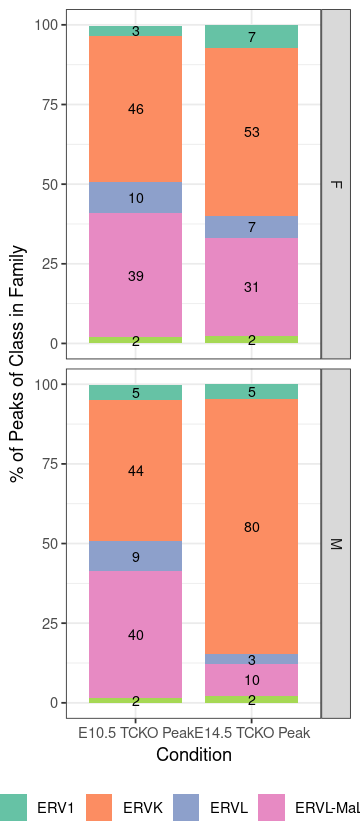

In [9]:
options(repr.plot.width=3, repr.plot.height=7)
order <- c("E10.5 TCKO Peak", "E14.5 TCKO Peak")
bothsex_prop <- ggplot(plotmelt, aes(fill=Family, y=value, x= factor(Class, order), label = (round(value)))) + geom_bar(position="stack", stat="identity", width = 0.8) + geom_text(size = 3, position = position_stack(vjust = 0.5)) + xlab(label = "Condition") + theme_bw()
bothsex_prop_export <- bothsex_prop + facet_grid(vars(Sex)) + scale_fill_brewer(palette = "Set2") + ylab(label = "% of Peaks of Class in Family") + theme(legend.position = "bottom")
bothsex_prop_export

In [10]:
pdf(file = 'ATAC_E105_E145_MUT_FamilyPercent.pdf', height = 7, width = 3)
bothsex_prop_export
dev.off()

png 
  2

In [12]:
#Load back in RPKM data. Below is a snippet (example) of the Deeptools multiBigWigSummary command used. 
#multiBigwigSummary BED-file -b $SCRATCH/H3K9me3_ChIP/bw/E105_H3K9me3_RPKM_bs10_extend_subtrack.bw $SCRATCH/H3K9me3_ChIP/bw/E135_F_H3K9me3_RPKM_bs10_extend_subtrack.bw --BED TRIM28_Agnostic_Female_export.bed -o ./H3K9me3_overlap/TRIM28_Agn_F.npz --outRawCounts ./H3K9me3_overlap/TRIM28_Agnostic_Female_H3K9me3.csv

cols <- c("Chr", "Start", "End", "E105_H3K9me3", "E135_H3K9me3")
K9_Male_E105 <- read.delim(file = './H3K9me3/TRIM28_E105_Male_H3K9me3.bed', header = T)
colnames(K9_Male_E105) <- cols
K9_Male_E105
#
K9_Male_E145 <- read.delim(file = './H3K9me3/TRIM28_E145_Male_H3K9me3.bed', header = T)
colnames(K9_Male_E145) <- cols
K9_Male_E145
#
K9_Female_E105 <- read.delim(file = './H3K9me3/TRIM28_E105_Female_H3K9me3.bed', header= T)
colnames(K9_Female_E105) <- cols
K9_Female_E105
#
K9_Female_E145 <- read.delim(file = './H3K9me3/TRIM28_E145_Female_H3K9me3.bed', header= T)
colnames(K9_Female_E145) <- cols
K9_Female_E145

Chr,Start,End,E105_H3K9me3,E135_H3K9me3
<chr>,<int>,<int>,<dbl>,<dbl>
1,3099205,3099379,-5.7850283,38.9023624
1,3637374,3637578,-3.2099658,-2.1523701
1,4126607,4126788,2.4603688,-10.1125273
1,4943430,4943589,-7.9703871,-2.2386329
1,5246599,5246841,1.4291930,0.3803369
1,5588340,5588488,-9.2863863,12.3775768
1,7008548,7008685,5.9148926,9.4937202
1,7523039,7523206,-0.9798310,-4.8661511
1,7724201,7724398,10.0955431,10.8401539


Chr,Start,End,E105_H3K9me3,E135_H3K9me3
<chr>,<int>,<int>,<dbl>,<dbl>
1,3217587,3218374,34.447420,63.52499
1,3217587,3218374,34.447420,63.52499
1,3220743,3221048,28.581351,56.90425
1,3345154,3345717,36.704545,32.82953
1,4051952,4053137,20.959421,28.86529
1,4629700,4630175,46.553885,33.61375
1,4637485,4638157,34.515721,49.10282
1,5450701,5451197,27.897250,32.36900
1,5817810,5818172,45.574525,44.43810


Chr,Start,End,E105_H3K9me3,E135_H3K9me3
<chr>,<int>,<int>,<dbl>,<dbl>
1,3642161,3642557,-5.73733197,4.02131928
1,5227199,5227300,-2.11824288,10.04807206
1,6337455,6337575,11.04376825,7.74345619
1,8105660,8105872,11.52134173,26.06565735
1,9283825,9283989,10.73395938,10.48631902
1,16117471,16117739,-4.32679785,0.40683470
1,16117471,16117739,-4.32679785,0.40683470
1,17846173,17846561,5.41274737,10.96495393
1,19695687,19695998,28.02639709,81.95592108


Chr,Start,End,E105_H3K9me3,E135_H3K9me3
<chr>,<int>,<int>,<dbl>,<dbl>
1,4058457,4058574,25.1900092,36.2163417
1,4858564,4859105,48.0661566,46.3781568
1,4858564,4859105,48.0661566,46.3781568
1,5055439,5055588,26.3658879,33.0423553
1,5898173,5898439,10.4359904,39.7621092
1,7890602,7890715,39.6272625,31.7667387
1,7890602,7890715,39.6272625,31.7667387
1,9007164,9007264,-5.4479498,-3.8339305
1,11290253,11290494,-1.0839139,-8.6175312


In [13]:
K9_Male_E105_trim <- K9_Male_E105[,4:5]
K9_Male_E105_trim <- reshape2::melt(K9_Male_E105_trim)
K9_Male_E105_trim$Sex <- c("Male")
K9_Male_E105_trim$Time <- c("E105")
K9_Male_E105_trim$ChIPSex <- c("MF")
head(K9_Male_E105_trim)
#
K9_Male_E145_trim <- K9_Male_E145[,4:5]
K9_Male_E145_trim <- reshape2::melt(K9_Male_E145_trim)
K9_Male_E145_trim$Sex <- c("Male")
K9_Male_E145_trim$Time <- c("E145")
K9_Male_E145_trim$ChIPSex <- c("M")
head(K9_Male_E145_trim)
#
K9_Female_E105_trim <- K9_Female_E105[,4:5]
K9_Female_E105_trim <- reshape2::melt(K9_Female_E105_trim)
K9_Female_E105_trim$Sex <- c("Female")
K9_Female_E105_trim$Time <- c("E105")
K9_Female_E105_trim$ChIPSex <- c("MF")
head(K9_Female_E105_trim)
#
K9_Female_E145_trim <- K9_Female_E145[,4:5]
K9_Female_E145_trim <- reshape2::melt(K9_Female_E145_trim)
K9_Female_E145_trim$Sex <- c("Female")
K9_Female_E145_trim$Time <- c("E145")
K9_Female_E145_trim$ChIPSex <- c("F")
head(K9_Female_E145_trim)

No id variables; using all as measure variables



,variable,value,Sex,Time,ChIPSex
,<fct>,<dbl>,<chr>,<chr>,<chr>
1,E105_H3K9me3,-5.785028,Male,E105,MF
2,E105_H3K9me3,-3.209966,Male,E105,MF
3,E105_H3K9me3,2.460369,Male,E105,MF
4,E105_H3K9me3,-7.970387,Male,E105,MF
5,E105_H3K9me3,1.429193,Male,E105,MF
6,E105_H3K9me3,-9.286386,Male,E105,MF


No id variables; using all as measure variables



,variable,value,Sex,Time,ChIPSex
,<fct>,<dbl>,<chr>,<chr>,<chr>
1,E105_H3K9me3,34.44742,Male,E145,M
2,E105_H3K9me3,34.44742,Male,E145,M
3,E105_H3K9me3,28.58135,Male,E145,M
4,E105_H3K9me3,36.70455,Male,E145,M
5,E105_H3K9me3,20.95942,Male,E145,M
6,E105_H3K9me3,46.55388,Male,E145,M


No id variables; using all as measure variables



,variable,value,Sex,Time,ChIPSex
,<fct>,<dbl>,<chr>,<chr>,<chr>
1,E105_H3K9me3,-5.737332,Female,E105,MF
2,E105_H3K9me3,-2.118243,Female,E105,MF
3,E105_H3K9me3,11.043768,Female,E105,MF
4,E105_H3K9me3,11.521342,Female,E105,MF
5,E105_H3K9me3,10.733959,Female,E105,MF
6,E105_H3K9me3,-4.326798,Female,E105,MF


No id variables; using all as measure variables



,variable,value,Sex,Time,ChIPSex
,<fct>,<dbl>,<chr>,<chr>,<chr>
1,E105_H3K9me3,25.19001,Female,E145,F
2,E105_H3K9me3,48.06616,Female,E145,F
3,E105_H3K9me3,48.06616,Female,E145,F
4,E105_H3K9me3,26.36589,Female,E145,F
5,E105_H3K9me3,10.43599,Female,E145,F
6,E105_H3K9me3,39.62726,Female,E145,F


In [14]:
boxmelt <- do.call("rbind", list(K9_Male_E105_trim, K9_Male_E145_trim, K9_Female_E105_trim, K9_Female_E145_trim))
head(boxmelt)
write.table(boxmelt, file = 'ATAC_ERVFamily_raw.tsv', sep = '\t', quote = F, row.names = F, col.names = T)

,variable,value,Sex,Time,ChIPSex
,<fct>,<dbl>,<chr>,<chr>,<chr>
1,E105_H3K9me3,-5.785028,Male,E105,MF
2,E105_H3K9me3,-3.209966,Male,E105,MF
3,E105_H3K9me3,2.460369,Male,E105,MF
4,E105_H3K9me3,-7.970387,Male,E105,MF
5,E105_H3K9me3,1.429193,Male,E105,MF
6,E105_H3K9me3,-9.286386,Male,E105,MF


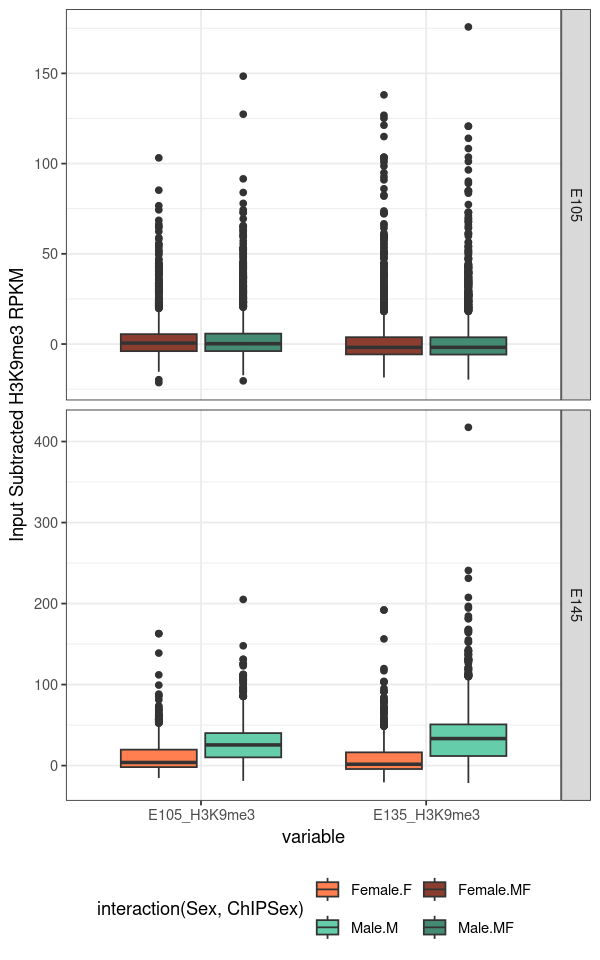

In [15]:
options(repr.plot.width=5, repr.plot.height=8)
order <- c("E105", "E145")
#
H3K9me3_regroup <- ggplot(boxmelt, aes(x = variable, y = value, fill = interaction(Sex, ChIPSex))) + geom_boxplot(stat = "boxplot") + facet_grid(vars(Time), scales="free") + scale_fill_manual(values=c("coral","mediumaquamarine","coral4","aquamarine4"), guide = guide_legend(nrow = 2)) + theme_bw() + ylab(label = "Input Subtracted H3K9me3 RPKM") + theme(legend.position = "bottom") 
#H3K9me3_regroup + coord_cartesian(ylim = c(-30,200))
H3K9me3_regroup

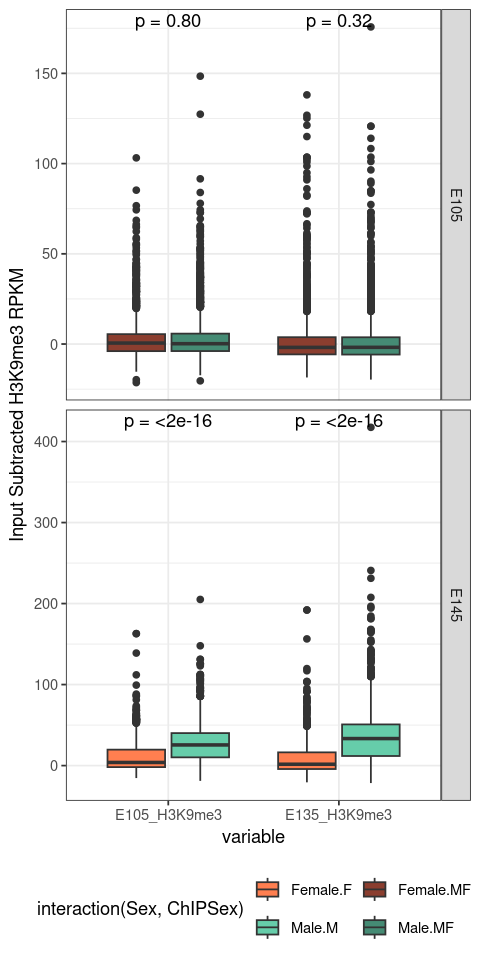

In [16]:
options(repr.plot.width=4, repr.plot.height=8)
new_stat <- H3K9me3_regroup + stat_compare_means(aes(group = Sex), method = "t.test", label = "p.format")
new_stat

In [12]:
pdf(file = 'TRIM28_Time_Sex_Split_Mut_H3K9me3_sig_newscale.pdf', height = 8, width = 4)
new_stat
dev.off()

png 
  2

In [14]:
sessionInfo()

R version 4.3.3 (2024-02-29)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 20.04.6 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/blas/libblas.so.3.9.0 
LAPACK: /usr/lib/x86_64-linux-gnu/lapack/liblapack.so.3.9.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: America/Los_Angeles
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] ggpubr_0.6.0       ggsignif_0.6.4     RColorBrewer_1.1-3 reshape2_1.4.4    
 [5] lubridate_1.9.3    forcats_1.0.0      stringr_1.5.1      dplyr_1.1.4       
 [9] purrr_1.0.2        readr_2.1.5        